In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')
import PIL
import numpy as np
import pandas as pd
import random
from tensorflow import keras
from tensorflow.keras import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,Flatten,Activation
from keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization
from keras.models import load_model
import cv2
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
import shutil
import glob
import random
import pickle
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,f1_score
from sklearn import metrics
import seaborn as sns
import pandas as pd

# MULTICLASS MODEL EVALUATION

In [3]:
path='C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass'
glioma_dir= os.path.join(path,'glioma_tumor')
meningioma_dir= os.path.join(path,'meningioma_tumor')
pituitary_dir= os.path.join(path,'pituitary_tumor')
no_tumor_dir=os.path.join(path,'no_tumor')

In [4]:
pickle_in= open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in= open("y.pickle","rb")
y = pickle.load(pickle_in)

In [5]:
X_train , X_test, y_train, y_test = train_test_split(X , y , test_size = 0.1, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train , y_train , test_size = 0.1, random_state = 42)
print(len(X_train)+len(X_val)+len(X_test))
print(X_train.shape,y_train.shape)
len(X_test)

2870
(2324, 150, 150, 1) (2324, 4)


287

In [80]:
new_model=load_model('model6.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 64)      640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 38, 38, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 19, 19, 128)      

In [81]:
test_loss, test_acc = new_model.evaluate(X_val,y_val)

9/9 [==============================] - 6s 622ms/step - loss: 0.2429 - accuracy: 0.8919


In [82]:
test_loss, test_acc = new_model.evaluate(X_test,y_test)

9/9 [==============================] - 6s 710ms/step - loss: 0.3403 - accuracy: 0.8815


## SINGLE IMAGE PREDICTION

In [141]:
category=np.sort(os.listdir(path))
category

array(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [28]:
def img_process(model, filepath,category):
    subdirname = os.path.basename(os.path.dirname(filepath))
    img2 = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2,(150,150))/255.
    img2 = np.reshape(img2,[-1,150,150,1])
    pred = model.predict(img2)

    predicted_label= category[np.argmax(pred)]
    Proba = model.predict_proba(img2)
    print('Probabilites of classes \n', Proba, '\n')
    print('Predicted class is', predicted_label)

    print('True class is ', subdirname,'\n')
    cat= np.argsort(pred[0])
    print('Percentage of predicted classes: \n')
    for i in range(4):
        print("{}".format(category[cat[i]])+" ({:.3})".format(pred[0][cat[i]]))

In [148]:
filepath= 'C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/meningioma_tumor/m3 (97).jpg'
category=np.sort(os.listdir(path))
img_process(new_model,filepath,category)

Probabilites of classes 
 [[0.46966386 0.4551145  0.0703079  0.00491371]] 

Predicted class is glioma_tumor
True class is  meningioma_tumor 

Percentage of predicted classes: 

pituitary_tumor (0.00491)
no_tumor (0.0703)
meningioma_tumor (0.455)
glioma_tumor (0.47)


In [149]:
filepath='C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/meningioma_tumor/m3 (88).jpg'
category=np.sort(os.listdir(path))
img_process(new_model,filepath,category)

Probabilites of classes 
 [[0.06329694 0.92886835 0.00467296 0.00316194]] 

Predicted class is meningioma_tumor
True class is  meningioma_tumor 

Percentage of predicted classes: 

pituitary_tumor (0.00316)
no_tumor (0.00467)
glioma_tumor (0.0633)
meningioma_tumor (0.929)


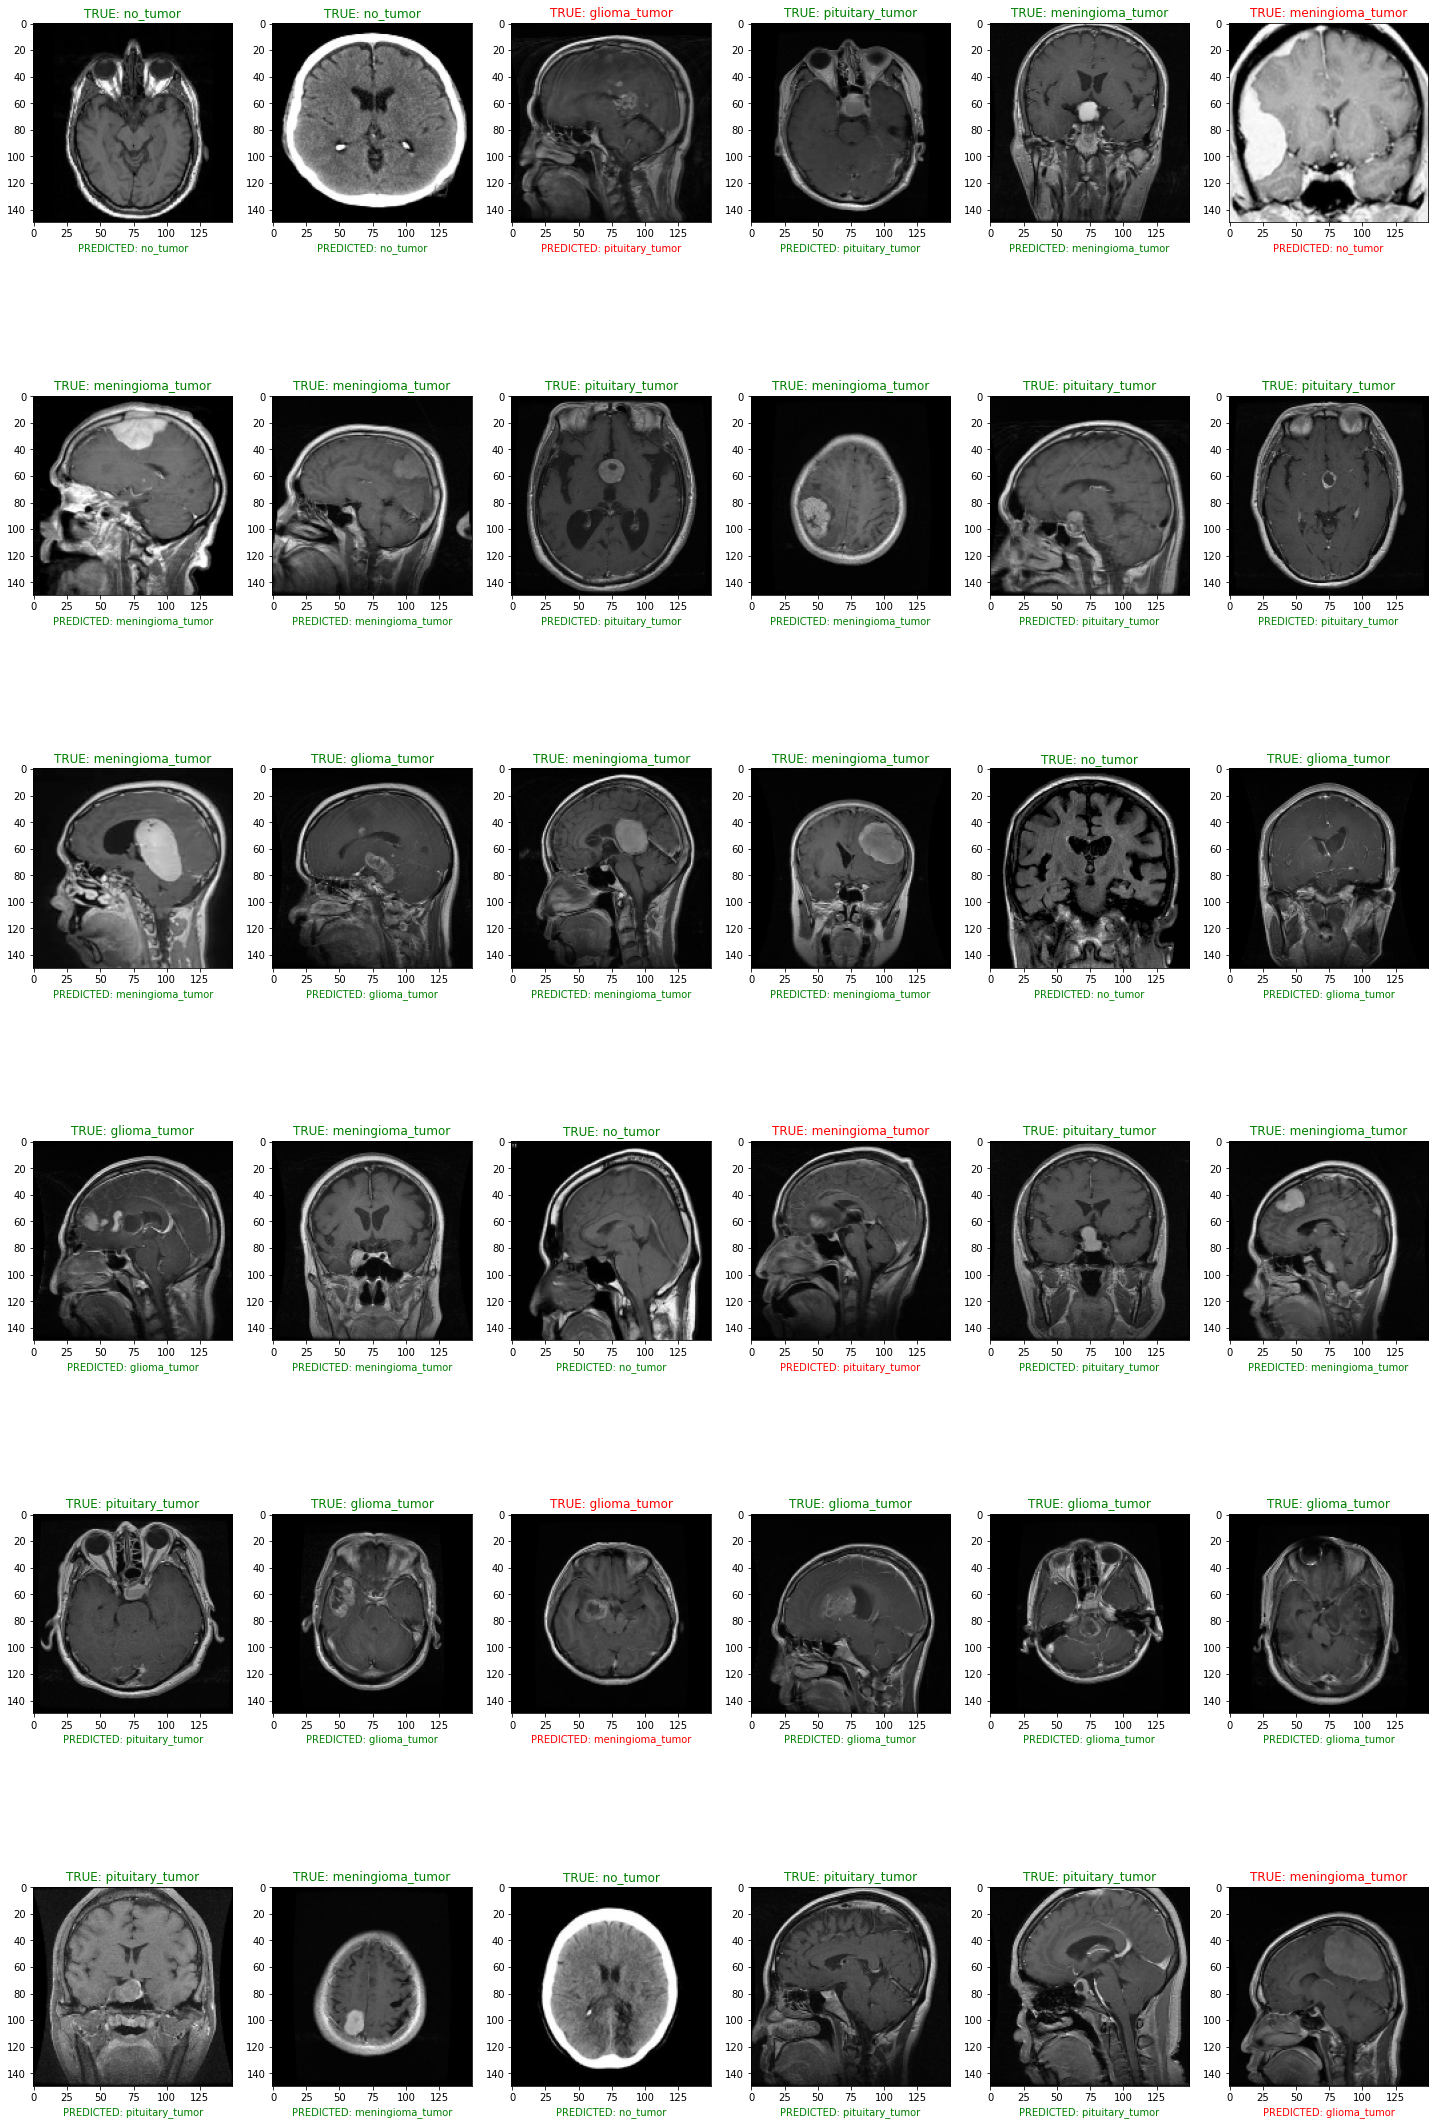

In [22]:
SIZE=150
categories = np.sort(os.listdir(path))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(new_model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(new_model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.squeeze(np.array(X_test)[k].reshape(-1,SIZE, SIZE, 1)), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(new_model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.squeeze(np.array(X_test)[k].reshape(-1,SIZE, SIZE, 1)), cmap='gray')

## Model Evaluation

                  precision    recall  f1-score   support

    glioma_tumor       0.90      0.82      0.86        84
meningioma_tumor       0.84      0.81      0.82        89
        no_tumor       0.84      0.97      0.90        38
 pituitary_tumor       0.93      0.97      0.95        76

        accuracy                           0.88       287
       macro avg       0.87      0.89      0.88       287
    weighted avg       0.88      0.88      0.88       287



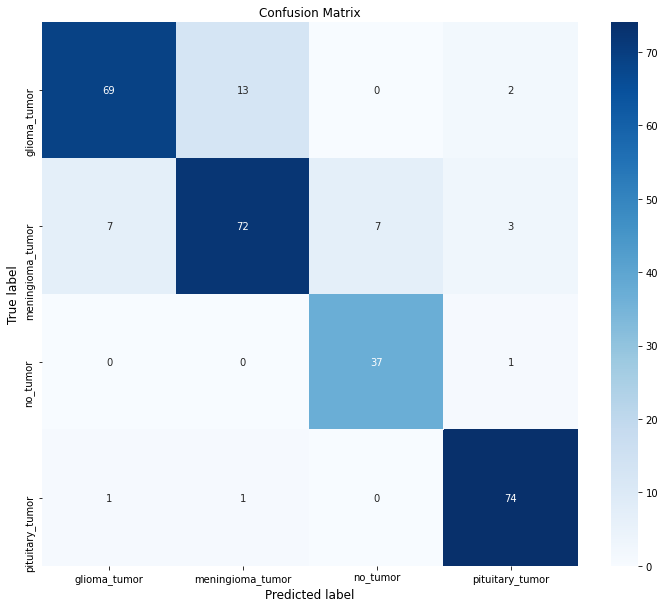

In [11]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(new_model.predict(X_test),axis=1)
categories=np.sort(os.listdir(path))
np.array(categories) 
print(classification_report(y_test_arg, Y_pred, 
                             target_names=categories))

cm= confusion_matrix(y_test_arg, Y_pred)

def conf_matrix(conf_mat):
    labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
    plt.figure(figsize=(12,10))
    ax=sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels,
                   annot=True, cmap="Blues")
    plt.ylabel('True label',size=12)
    plt.xlabel('Predicted label',size=12)
    ax.set_title('Confusion Matrix')
conf_matrix(cm)

# BINARY CLASSES 

In [9]:
def img_process_bin(model, filepath,category):
    subdirname = os.path.basename(os.path.dirname(filepath))
    img2 = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2,(150,150))/255.
    img2 = np.reshape(img2,[-1,150,150,1])
    pred = model.predict(img2)
    
    predicted_label= category[np.argmax(pred)]
    Proba = model.predict_proba(img2)
    print('Probabilites of classes \n', Proba, '\n')
    print('Predicted class is', predicted_label)


    print('True class is ', subdirname,'\n')
    cat= np.argsort(pred[0])
    print('Percentage of predicted classes: \n')
    for i in range(2):
        print("{}".format(category[cat[i]])+" ({:.3})".format(pred[0][cat[i]]))

**BEST MODELS OF EACH BINARY DATA SET**

In [10]:
model_men= load_model('model_bin_men.h5')
model_pit= load_model('model_bin_pt.h5')
model_gli= load_model('model_bin_gl.h5')

## MENINGIOMA BINARY DATA SET

### Single Image Prediction With MODEL_MENINGIOMA

In [166]:
# 154
category= ['meningioma', 'non_meningioma']
filepath= 'C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/meningioma_tumor/m2 (154).jpg'
img_process_bin(model_men,filepath,category)

Probabilites of classes 
 [[0.89079857 0.10920151]] 

Predicted class is meningioma
True class is  meningioma_tumor 

Percentage of predicted classes: 

non_meningioma (0.109)
meningioma (0.891)


In [167]:
#105
filepath='C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/meningioma_tumor/m (105).jpg'
img_process_bin(model_men,filepath,category)

Probabilites of classes 
 [[0.9343789  0.06562109]] 

Predicted class is meningioma
True class is  meningioma_tumor 

Percentage of predicted classes: 

non_meningioma (0.0656)
meningioma (0.934)


In [168]:
#311
filepath= 'C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/pituitary_tumor/p (311).jpg'
img_process_bin(model_men,filepath,category)

Probabilites of classes 
 [[0.05785729 0.9421427 ]] 

Predicted class is non_meningioma
True class is  pituitary_tumor 

Percentage of predicted classes: 

meningioma (0.0579)
non_meningioma (0.942)


In [169]:
# 3
filepath= 'C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/glioma_tumor/gg (3).jpg'
img_process_bin(model_men,filepath,category)

Probabilites of classes 
 [[0.41709056 0.5829094 ]] 

Predicted class is non_meningioma
True class is  glioma_tumor 

Percentage of predicted classes: 

meningioma (0.417)
non_meningioma (0.583)


### Meningioma Tumor Prediction With Model_Meningioma

In [11]:
pickle_in= open("X1.pickle","rb")
X = pickle.load(pickle_in)

pickle_in= open("y1.pickle","rb")
y = pickle.load(pickle_in)

In [12]:
X_men_train , X_men_test, y_men_train, y_men_test = train_test_split(X , y , test_size = 0.1, random_state = 42)
X_men_train , X_men_val, y_men_train, y_men_val = train_test_split(X_men_train , y_men_train , test_size = 0.1, random_state = 42)
print(len(X_men_train)+len(X_men_val)+len(X_men_test))
print(X_men_train.shape)
len(X_men_test)

1644
(1331, 150, 150, 1)


165

In [13]:
# since the binary class is in index=0 true meng = TN,true non-meng=TP sum(y_test_arg) gives the total number of "NON-class" 
# we find the correct predictions of tumor class by  len(y_test) - sum(y_test_arg)
def conf_mat(model,X_test,y_test,categories):
    y_test_arg=np.argmax(y_test,axis=1)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    categories= categories
    print(classification_report(y_test_arg, Y_pred, target_names=categories))

    cm= confusion_matrix(y_test_arg, Y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test_arg, Y_pred).ravel()
    print(f'Number of true prediction is {tn} out of {(tn + fp)}')
    print(f'Number of true prediction is {tn} out of {(fn + tn)}')
    print(f'Number of true prediction is {tp} out of {(fp + tp)}')

    def conf_matrix(conf_mat):
        labels = categories
        plt.figure(figsize=(8,6))
        ax=sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels,
                       annot=True, cmap="Blues")
        plt.ylabel('True label',size=12)
        plt.xlabel('Predicted label',size=12)
        ax.set_title('Confusion Matrix')
    conf_matrix(cm)

                precision    recall  f1-score   support

    meningioma       0.82      0.91      0.86        86
non_meningioma       0.89      0.78      0.83        79

      accuracy                           0.85       165
     macro avg       0.85      0.85      0.85       165
  weighted avg       0.85      0.85      0.85       165

Number of true prediction is 78 out of 86
Number of true prediction is 78 out of 95
Number of true prediction is 62 out of 70


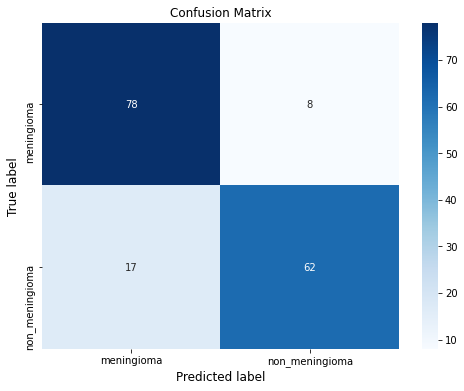

In [14]:
categories= ['meningioma', 'non_meningioma']
conf_mat(model_men,X_men_test,y_men_test,categories)

## PITUITARY BINARY DATA SET

### Single Image Prediction With MODEL_PITUITARY

In [170]:
# 154
category= ['pituitary', 'non_pituitary']
filepath='C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/meningioma_tumor/m2 (154).jpg'
img_process_bin(model_pit,filepath,category)

Probabilites of classes 
 [[0.9931416  0.00685841]] 

Predicted class is pituitary
True class is  meningioma_tumor 

Percentage of predicted classes: 

non_pituitary (0.00686)
pituitary (0.993)


In [171]:
# 311
filepath='C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/pituitary_tumor/p (311).jpg'
img_process_bin(model_pit,filepath,category)

Probabilites of classes 
 [[0.09221216 0.90778786]] 

Predicted class is non_pituitary
True class is  pituitary_tumor 

Percentage of predicted classes: 

pituitary (0.0922)
non_pituitary (0.908)


In [172]:
# 105
filepath= 'C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/meningioma_tumor/m (105).jpg'
img_process_bin(model_pit,filepath,category)

Probabilites of classes 
 [[0.34233832 0.65766174]] 

Predicted class is non_pituitary
True class is  meningioma_tumor 

Percentage of predicted classes: 

pituitary (0.342)
non_pituitary (0.658)


### Pituitary Tumor Prediction With Model_Pituitary

In [25]:
pickle_in= open("X2.pickle","rb")
X_pit = pickle.load(pickle_in)

pickle_in= open("y2.pickle","rb")
y_pit = pickle.load(pickle_in)

In [26]:
X_pit_train , X_pit_test, y_pit_train, y_pit_test = train_test_split(X_pit , y_pit , test_size = 0.1, random_state = 42)
X_pit_train , X_pit_val, y_pit_train,y_pit_val = train_test_split(X_pit_train ,y_pit_train , test_size = 0.1, random_state = 42)
print(len(X_pit_train)+len(X_pit_val)+len(X_pit_test))
print(X_pit_train.shape)
len(X_pit_test)

1653
(1338, 150, 150, 1)


166

               precision    recall  f1-score   support

    pituitary       0.97      0.78      0.87        88
non_pituitary       0.80      0.97      0.88        78

     accuracy                           0.87       166
    macro avg       0.89      0.88      0.87       166
 weighted avg       0.89      0.87      0.87       166

Number of true prediction is 69 out of 88


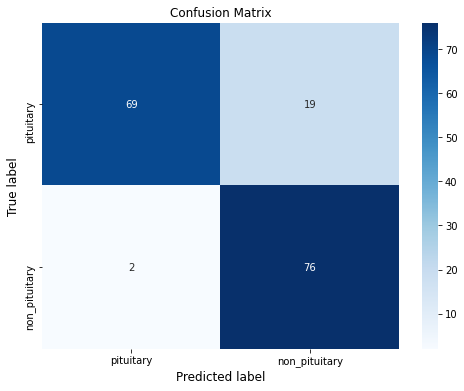

In [29]:
categories= ['pituitary', 'non_pituitary']
conf_mat(model_pit,X_pit_test,y_pit_test,categories)

## GLIOMA BINARY DATA SET

### Single Image Prediction with MODEL_GLIOMA

In [173]:
# 105
category= ['glioma', 'non_glioma']
filepath= 'C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/meningioma_tumor/m (105).jpg'
img_process_bin(model_gli,filepath,category)

Probabilites of classes 
 [[0.27903667 0.72096324]] 

Predicted class is non_glioma
True class is  meningioma_tumor 

Percentage of predicted classes: 

glioma (0.279)
non_glioma (0.721)


In [175]:
# 311
filepath='C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/pituitary_tumor/p (311).jpg'
img_process_bin(model_gli,filepath,category)

Probabilites of classes 
 [[0.09743892 0.9025611 ]] 

Predicted class is non_glioma
True class is  pituitary_tumor 

Percentage of predicted classes: 

glioma (0.0974)
non_glioma (0.903)


In [176]:
# 154
filepath='C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/meningioma_tumor/m2 (154).jpg'
img_process_bin(model_gli,filepath,category)

Probabilites of classes 
 [[0.848486   0.15151395]] 

Predicted class is glioma
True class is  meningioma_tumor 

Percentage of predicted classes: 

non_glioma (0.152)
glioma (0.848)


### Glioma Tumor Prediction With Model_Glioma 

In [27]:
pickle_in= open("X3.pickle","rb")
X_gli = pickle.load(pickle_in)

pickle_in= open("y3.pickle","rb")
y_gli = pickle.load(pickle_in)

In [28]:
X_gli_train , X_gli_test, y_gli_train, y_gli_test = train_test_split(X_gli , y_gli , test_size = 0.1, random_state = 42)
X_gli_train , X_gli_val, y_gli_train,y_gli_val = train_test_split(X_gli_train ,y_gli_train , test_size = 0.1, random_state = 42)
print(len(X_gli_train)+len(X_gli_val)+len(X_gli_test))
print(X_gli_train.shape)
len(X_gli_test)

1652
(1337, 150, 150, 1)


166

              precision    recall  f1-score   support

      glioma       0.76      0.77      0.77        88
  non_glioma       0.74      0.73      0.74        78

    accuracy                           0.75       166
   macro avg       0.75      0.75      0.75       166
weighted avg       0.75      0.75      0.75       166

Number of true prediction is 68 out of 88


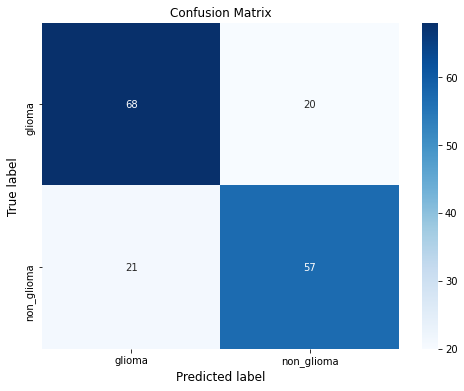

In [35]:
categories= ['glioma', 'non_glioma']
conf_mat(model_gli,X_gli_test,y_gli_test,categories)

# ENSEMBLE MODEL

In [78]:
def img_process(filepath):
    subdirname = os.path.basename(os.path.dirname(filepath))
    img2 = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2,(150,150))/255.
    img2 = np.reshape(img2,[-1,150,150,1])
    
    pred=[]
    pred.append(pd.Series(new_model.predict_proba(img2)[:,0]))
    pred.append(pd.Series(new_model.predict_proba(img2)[:,1]))
    pred.append(pd.Series(new_model.predict_proba(img2)[:,2]))
    pred.append(pd.Series(new_model.predict_proba(img2)[:,3]))
    
    for model in [model_men, model_pit, model_gli]:
        pred.append(pd.Series(model.predict_proba(img2)[:,0]))
    predict = pd.concat(pred,axis=1)
    predict.columns=['multi_glioma', 'multi_meningioma','multi_no','multi_pituitary','model_meningioma', 'model_pituitary', 'model_glioma']
    predict['highest_pred_model']= np.where(predict.max(axis=1), predict.idxmax(axis=1),'None')
    predict['Highest predicted class']= predict['highest_pred_model'].str.split('_').apply(lambda x: x[1])
    
    predict['true_label']=np.array(subdirname)
    predict['True Class'] =  predict['true_label'].str.split('_').apply(lambda x: x[0])
    predict.drop(['highest_pred_model','true_label'],axis=1, inplace=True)
    return predict

In [79]:
path='C:/Users/laptop/Desktop/BRAIN_TUMOR_STUDY/brain-tumor-classification-mri/Training/MultiClass/meningioma_tumor/m2 (154).jpg'
img_process(path)

,multi_glioma,multi_meningioma,multi_no,multi_pituitary,model_meningioma,model_pituitary,model_glioma,Highest predicted class,True Class
0,0.043286,0.956708,4.925593e-08,0.000006,0.890799,0.993142,0.848486,pituitary,meningioma


In [66]:
category= ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
def model(X_test,y_test):
    pred=[]
    pred.append(pd.Series(new_model.predict_proba(X_test)[:,0]))
    pred.append(pd.Series(new_model.predict_proba(X_test)[:,1]))
    pred.append(pd.Series(new_model.predict_proba(X_test)[:,2]))
    pred.append(pd.Series(new_model.predict_proba(X_test)[:,3]))
    
    for model in [model_men, model_pit, model_gli]:
        pred.append(pd.Series(model.predict_proba(X_test)[:,0]))
    predict = pd.concat(pred,axis=1)
    predict.columns=['multi_glioma', 'multi_meningioma','multi_no','multi_pituitary','model_meningioma', 'model_pituitary', 'model_glioma']
    predict['highest_pred_model']= np.where(predict.max(axis=1), predict.idxmax(axis=1),'None')
    predict['Highest predicted class']= predict['highest_pred_model'].str.split('_').apply(lambda x: x[1])
    true_label=[]
    for i in y_test:
        true_label.append((category[np.argmax(i)]))
    predict['true_label']=np.array(true_label)
    predict['True Class'] =  predict['true_label'].str.split('_').apply(lambda x: x[0])
    predict.drop(['highest_pred_model','true_label'],axis=1, inplace=True)
    return predict

In [67]:
predict= model(X_test,y_test)
predict

,multi_glioma,multi_meningioma,multi_no,multi_pituitary,model_meningioma,model_pituitary,model_glioma,Highest predicted class,True Class
0,9.292945e-01,0.046003,0.016987,0.007716,0.172237,0.814178,0.656571,glioma,glioma
1,1.419073e-02,0.055574,0.001617,0.928619,0.080072,0.092915,0.172039,pituitary,pituitary
2,9.840058e-01,0.015040,0.000118,0.000835,0.120802,0.944644,0.797158,glioma,glioma
3,9.920164e-01,0.002056,0.000012,0.005916,0.199585,0.798835,0.678669,glioma,glioma
4,6.404640e-05,0.002102,0.000038,0.997796,0.066450,0.028776,0.017615,pituitary,pituitary
...,...,...,...,...,...,...,...,...,...
282,9.392075e-05,0.005869,0.000020,0.994017,0.064295,0.080761,0.044881,pituitary,pituitary
283,9.851320e-01,0.010299,0.000858,0.003710,0.102678,0.835626,0.841979,glioma,glioma
284,3.590486e-09,0.001905,0.997522,0.000573,0.744856,0.085861,0.000471,no,no
285,2.659938e-04,0.012298,0.000577,0.986859,0.064346,0.050961,0.046619,pituitary,pituitary


In [68]:
predict.groupby('True Class')['Highest predicted class'].value_counts()  

True Class  Highest predicted class
glioma      glioma                     54
            pituitary                  23
            meningioma                  7
meningioma  meningioma                 63
            pituitary                  22
            glioma                      4
no          no                         23
            meningioma                 15
pituitary   pituitary                  73
            meningioma                  2
            glioma                      1
Name: Highest predicted class, dtype: int64